In [28]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline

from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    mean_absolute_percentage_error,
    confusion_matrix,
    make_scorer, f1_score,
    precision_score,
    recall_score,
    RocCurveDisplay,
    roc_auc_score,
    r2_score
)


In [29]:
data = pd.read_csv('organiseddata.csv')
data['age'] = data['age'].str.replace('[','(',regex=False)
data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,(70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,(70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,(50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,(70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,(60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,(80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,(80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,(70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,(70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [30]:
data.shape

(25000, 17)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [32]:
data.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

DATA CLEANING

In [33]:
# Step 1: Identifying Missing Values
missing_values = data.isnull().sum()

# Step 2: Checking for Duplicate Rows
duplicate_rows = data.duplicated().sum()

# Step 3: Checking for Inconsistencies in Categorical Data
# For simplicity, we'll check a few categorical columns for any unusual or inconsistent categories
unique_ages = data['age'].unique()
unique_medical_specialty = data['medical_specialty'].unique()
unique_readmitted = data['readmitted'].unique()

# Step 4: Checking for any Anomalies in Numerical Data (like negative values where not expected)
# We'll check for negative values in columns where it doesn't make sense (like number of procedures, medications, etc.)
negative_values_check = (data[['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']] < 0).sum()

print(missing_values, duplicate_rows, unique_ages, unique_medical_specialty, unique_readmitted, negative_values_check)


age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64 0 ['(70-80)' '(50-60)' '(60-70)' '(40-50)' '(80-90)' '(90-100)'] ['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma'] ['no' 'yes'] time_in_hospital    0
n_lab_procedures    0
n_procedures        0
n_medications       0
n_outpatient        0
n_inpatient         0
n_emergency         0
dtype: int64


DATA Transformation

In [34]:
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the dataset for transformations
transformed_data = data.copy()

# Label encoding for binary categorical variables
binary_columns = ['glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted']
label_encoder = LabelEncoder()
for col in binary_columns:
    transformed_data[col] = label_encoder.fit_transform(transformed_data[col])

# One-hot encoding for multi-category variables
multi_category_columns = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
transformed_data = pd.get_dummies(transformed_data, columns=multi_category_columns)

# Displaying the transformed data
transformed_data.head()


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,glucose_test,A1Ctest,change,...,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory
0,8,72,1,18,2,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
1,3,34,2,13,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
2,5,45,0,18,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
3,2,36,0,12,1,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,0
4,1,42,0,7,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
transformed_data.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,glucose_test,A1Ctest,change,...,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600,1.000120,0.936320,0.460120,...,0.362240,0.114880,0.307440,0.170440,0.03664,0.018560,0.007840,0.018200,0.364280,0.076600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873,0.234525,0.398034,0.498417,...,0.480657,0.318883,0.461442,0.376026,0.18788,0.134968,0.088198,0.133677,0.481237,0.265961
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   time_in_hospital                          25000 non-null  int64
 1   n_lab_procedures                          25000 non-null  int64
 2   n_procedures                              25000 non-null  int64
 3   n_medications                             25000 non-null  int64
 4   n_outpatient                              25000 non-null  int64
 5   n_inpatient                               25000 non-null  int64
 6   n_emergency                               25000 non-null  int64
 7   glucose_test                              25000 non-null  int64
 8   A1Ctest                                   25000 non-null  int64
 9   change                                    25000 non-null  int64
 10  diabetes_med                              25000 non-null  

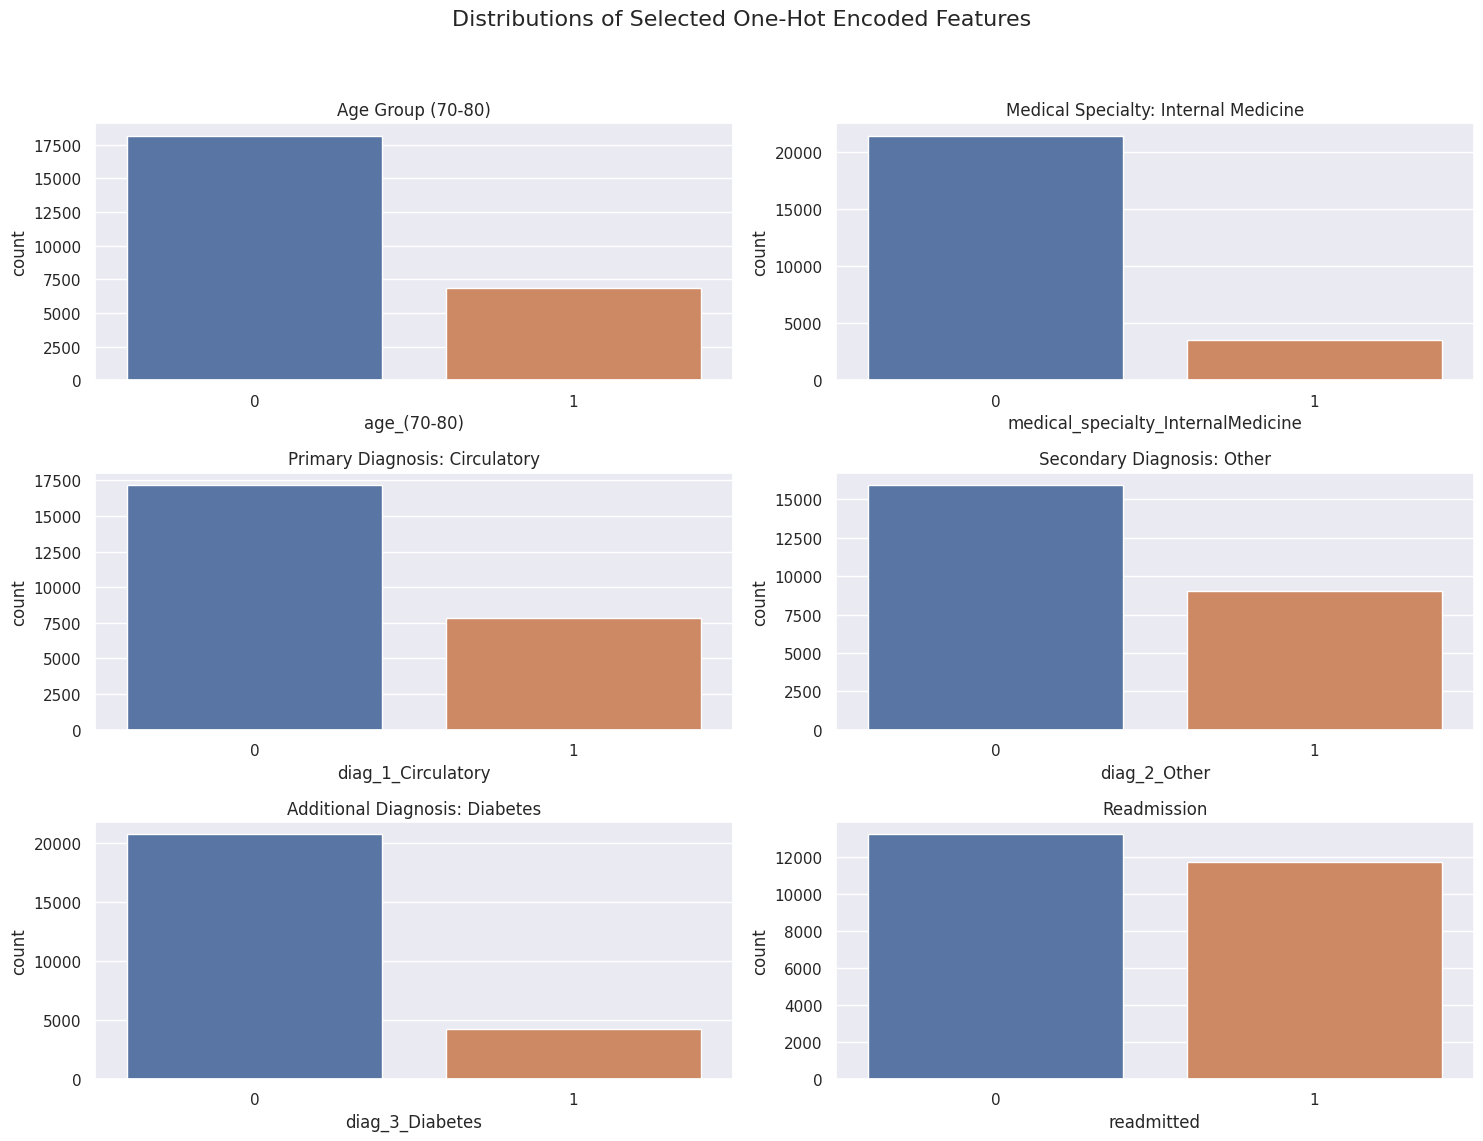

In [36]:
# Performing EDA on the transformed dataset

# Overview of the transformed dataset's structure and summary statistics
transformed_data_info = transformed_data.info()
transformed_data_description = transformed_data.describe()

# Plotting distributions of some of the new numerical features (one-hot encoded features)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.suptitle('Distributions of Selected One-Hot Encoded Features', fontsize=16)

# Plotting for a selection of one-hot encoded features
sns.countplot(x=transformed_data['age_(70-80)'], ax=axes[0, 0])
axes[0, 0].set_title('Age Group (70-80)')

sns.countplot(x=transformed_data['medical_specialty_InternalMedicine'], ax=axes[0, 1])
axes[0, 1].set_title('Medical Specialty: Internal Medicine')

sns.countplot(x=transformed_data['diag_1_Circulatory'], ax=axes[1, 0])
axes[1, 0].set_title('Primary Diagnosis: Circulatory')

sns.countplot(x=transformed_data['diag_2_Other'], ax=axes[1, 1])
axes[1, 1].set_title('Secondary Diagnosis: Other')

sns.countplot(x=transformed_data['diag_3_Diabetes'], ax=axes[2, 0])
axes[2, 0].set_title('Additional Diagnosis: Diabetes')

sns.countplot(x=transformed_data['readmitted'], ax=axes[2, 1])
axes[2, 1].set_title('Readmission')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])



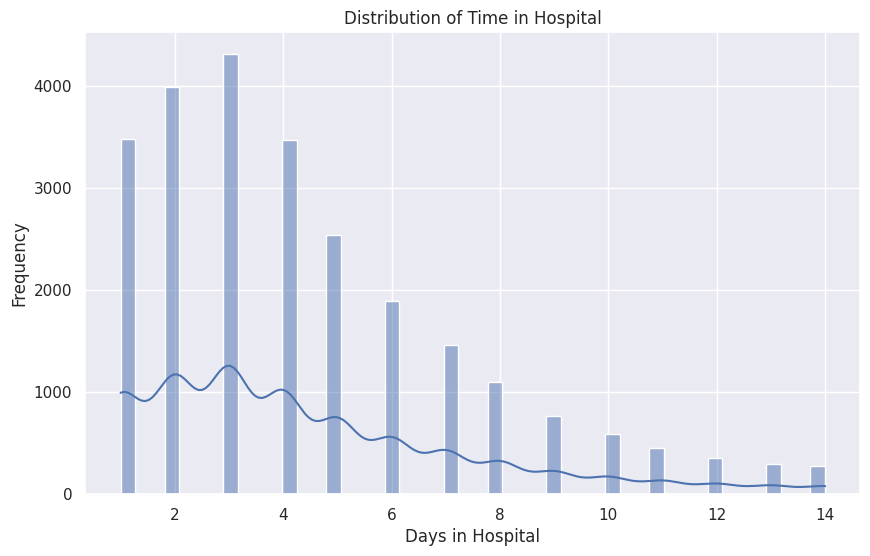

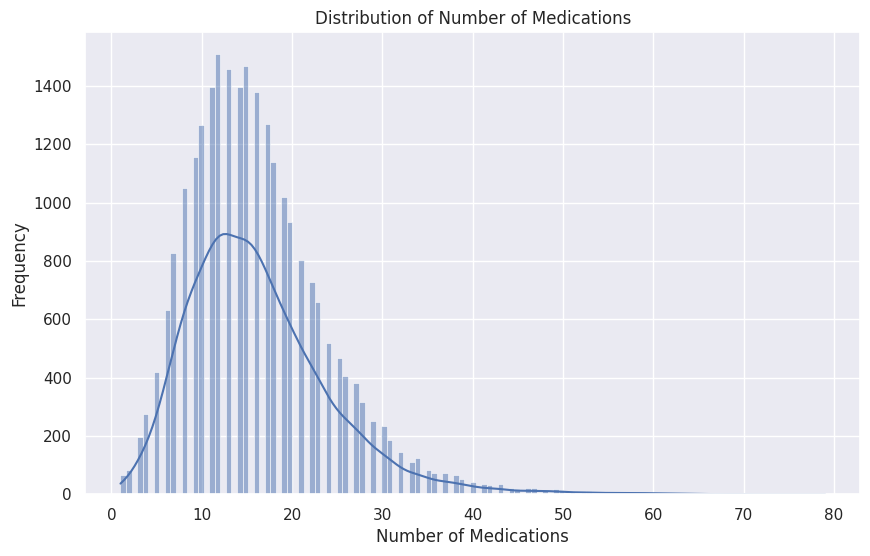

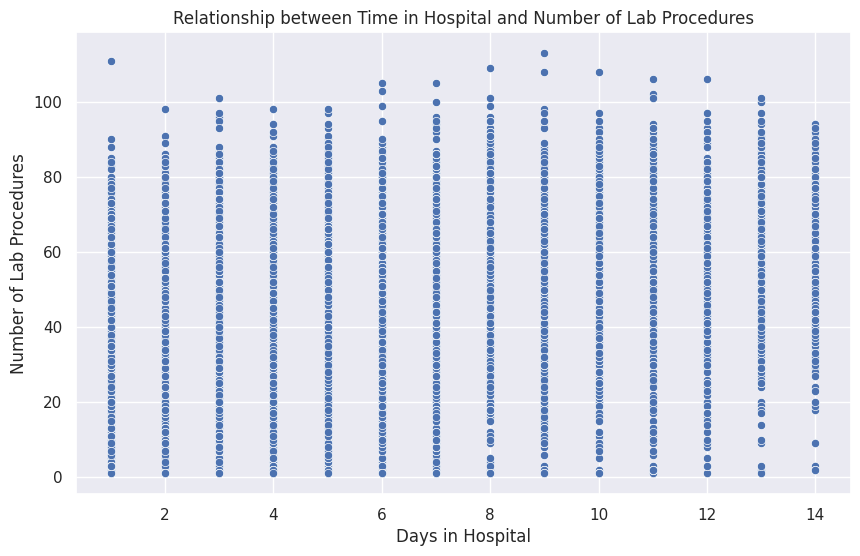

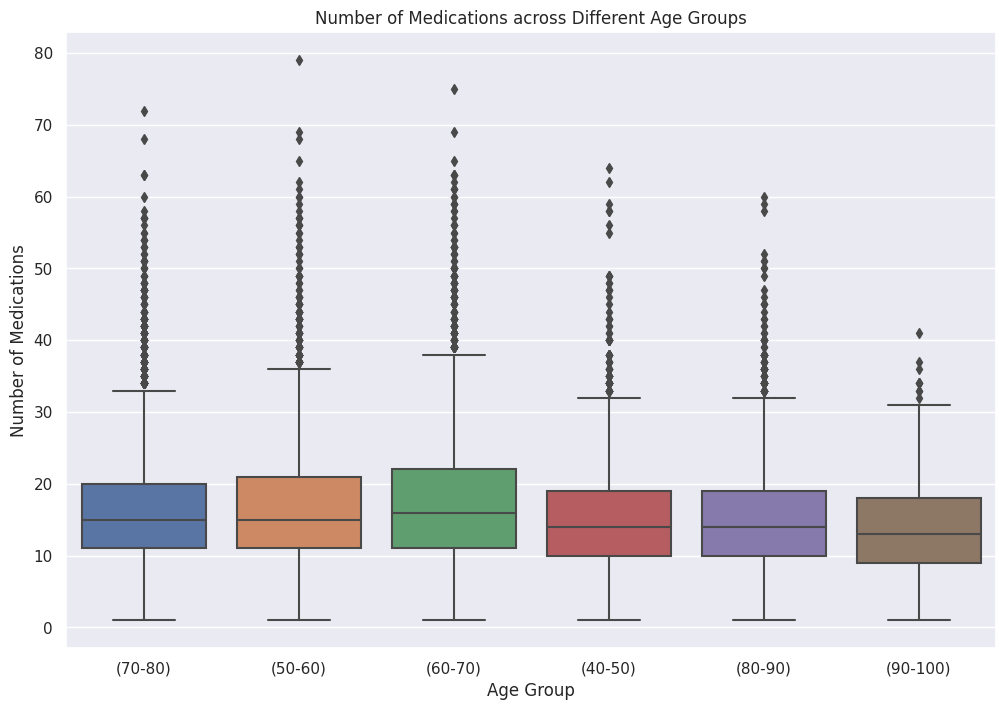

In [37]:
# Additional EDA on the transformed dataset

# Distribution of Time in Hospital
plt.figure(figsize=(10, 6))
sns.histplot(transformed_data['time_in_hospital'], kde=True)
plt.title('Distribution of Time in Hospital')
plt.xlabel('Days in Hospital')
plt.ylabel('Frequency')
plt.show()

# Number of Medications Distribution
plt.figure(figsize=(10, 6))
sns.histplot(transformed_data['n_medications'], kde=True)
plt.title('Distribution of Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to see the relationship between Time in Hospital and Number of Lab Procedures
plt.figure(figsize=(10, 6))
sns.scatterplot(x=transformed_data['time_in_hospital'], y=transformed_data['n_lab_procedures'])
plt.title('Relationship between Time in Hospital and Number of Lab Procedures')
plt.xlabel('Days in Hospital')
plt.ylabel('Number of Lab Procedures')
plt.show()

# Boxplot to see the distribution of Number of Medications across different Age Groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='age', y='n_medications', data=data)  # Using original data for age categories
plt.title('Number of Medications across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Medications')
plt.show()


<ipython-input-38-fa1c04a9c5ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


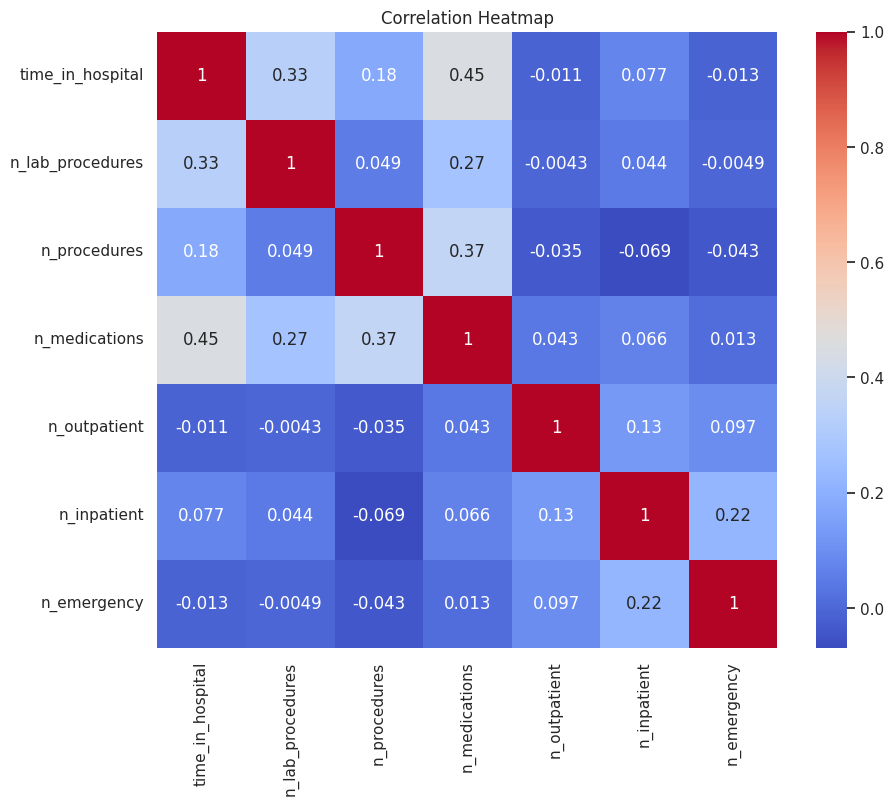

In [38]:
# Correlation heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Questions

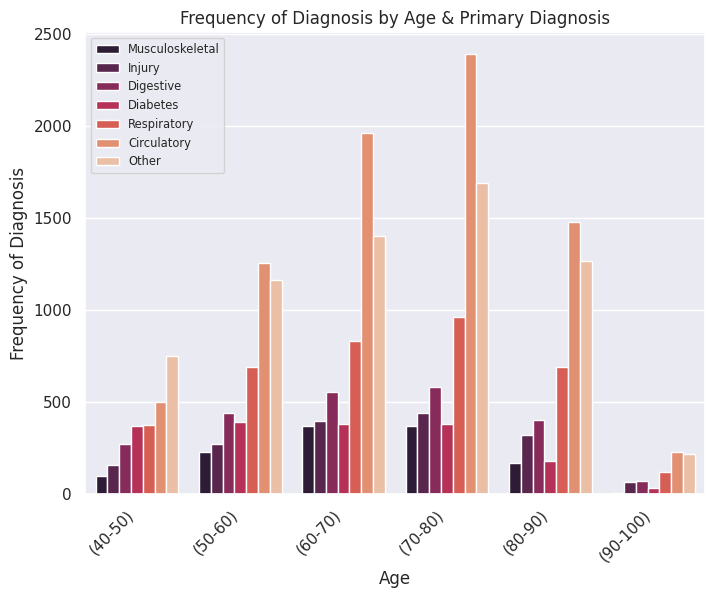

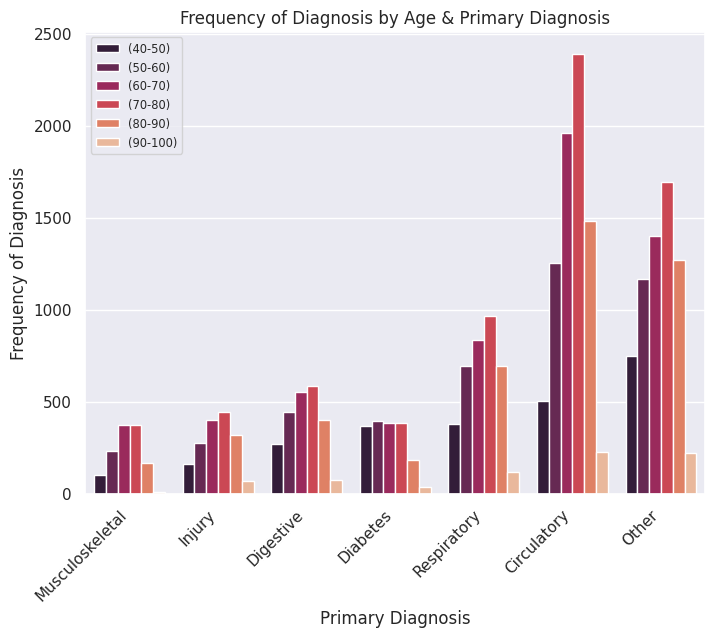

In [39]:
#What is the most common primary diagnosis by age group?
groupings = [['age',True,'Age','Primary Diagnosis'],
             ['diag_2',False,'Primary Diagnosis','Age']]

for i in groupings:
    df_chart = data.groupby(['age','diag_1']).agg({'diag_2':'count'}).reset_index().sort_values(i[0],ascending=i[1])
    df_chart = df_chart.rename(columns={'age': 'Age',
                                        'diag_1':'Primary Diagnosis',
                                        'diag_2':'Frequency'}).sort_values(by=['Age','Frequency'])
    df_chart = df_chart[df_chart['Primary Diagnosis'] != 'Missing']

    chart = sns.barplot(data=df_chart,x=i[2],y="Frequency",hue=i[3],palette = 'rocket')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    sns.set(rc={'figure.figsize':(8,6)})
    plt.legend(loc='upper left',fontsize='x-small',title_fontsize='x-small')
    plt.ylabel('Frequency of Diagnosis')
    plt.title("Frequency of Diagnosis by Age & Primary Diagnosis")
    plt.show()

Circulatory diagnoses are the most common across all age groups with the
exception of diabetes in the youngest cohort.

For younger cohorts (40-50) respiratory diagnoses are less pronounced.

However, for aging cohorts (50+), respiratory diagnoses become more pronounced as age progresses

**Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates.**

In [40]:
#Add diabetes indicator (i.e. if any of diagnoses are diabetes 1, else 0)
diagCols = ['diag_1','diag_2','diag_3']
diag = 'Diabetes'

data['Diabetes_ind'] = (data['diag_1'].str.contains(diag) | data['diag_2'].str.contains(diag) | data['diag_3'].str.contains(diag)) * 1
data[data['Diabetes_ind'] == 1].head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,Diabetes_ind
3,(70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,1
12,(70-80),8,67,0,21,0,0,0,Other,Diabetes,Circulatory,Other,no,normal,no,yes,no,1
14,(80-90),2,73,1,26,0,0,0,InternalMedicine,Circulatory,Other,Diabetes,no,no,no,yes,no,1
16,(70-80),3,52,0,10,0,0,0,Other,Circulatory,Other,Diabetes,no,no,no,yes,yes,1
18,(40-50),7,72,0,13,0,0,0,InternalMedicine,Diabetes,Other,Other,no,high,no,yes,yes,1


In [41]:
data['readmitted'].value_counts(normalize=True)

no     0.52984
yes    0.47016
Name: readmitted, dtype: float64

In [42]:
data[['Diabetes_ind','readmitted']].value_counts(normalize=True)

Diabetes_ind  readmitted
0             no            0.34188
              yes           0.30660
1             no            0.18796
              yes           0.16356
dtype: float64

In [ ]:
#Quick Look at readmission rates (normalized value_counts)
print(data[['Diabetes_ind']].value_counts(normalize=False))
print(data[['Diabetes_ind']].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
print('')

print(data[['Diabetes_ind','readmitted']].value_counts(normalize=False))
print(data[['Diabetes_ind','readmitted']].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Diabetes_ind
0               16212
1                8788
dtype: int64
Diabetes_ind
0               64.8%
1               35.2%
dtype: object

Diabetes_ind  readmitted
0             no            8547
              yes           7665
1             no            4699
              yes           4089
dtype: int64
Diabetes_ind  readmitted
0             no            34.2%
              yes           30.7%
1             no            18.8%
              yes           16.4%
dtype: object


A Diabetes diagnosis by itself does not appear to indicate higher readmission rates.

However, being prescribed diabetes medication is associated with higher readmission rates in every age cohort.

Also, a change in diabetes medication is also associated with higher readmittance rates.

While the doctors are directionally correct in their observations about diabetes driving readmission, more specifically, it is changes in medication or the initial prescription of medication that is associated with readmission.

Conclusion: Hospitals should focus their follow up efforts on patients who have been prescribed a diabetes medication or who have had their medications changed.

DATA MODELING

Logistic Regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Defining the target variable and features
X = transformed_data.drop('readmitted', axis=1)
y = transformed_data['readmitted']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(class_report)


              precision    recall  f1-score   support

           0       0.60      0.79      0.68      2658
           1       0.63      0.41      0.50      2342

    accuracy                           0.61      5000
   macro avg       0.62      0.60      0.59      5000
weighted avg       0.61      0.61      0.59      5000



Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Creating and training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(class_report_rf)


              precision    recall  f1-score   support

           0       0.62      0.70      0.66      2658
           1       0.60      0.50      0.55      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.60      5000
weighted avg       0.61      0.61      0.61      5000



Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Creating and training the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Using the original train set (not PCA-transformed)

# Predicting on the test set using the Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(class_report_dt)


              precision    recall  f1-score   support

           0       0.57      0.57      0.57      2658
           1       0.51      0.52      0.52      2342

    accuracy                           0.55      5000
   macro avg       0.54      0.54      0.54      5000
weighted avg       0.55      0.55      0.55      5000



SVM

In [46]:
from sklearn.svm import SVC

# Creating and training the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predicting on the test set using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print(class_report_svm)


              precision    recall  f1-score   support

           0       0.58      0.91      0.71      2658
           1       0.71      0.25      0.37      2342

    accuracy                           0.60      5000
   macro avg       0.65      0.58      0.54      5000
weighted avg       0.64      0.60      0.55      5000



Best Model Evaluation

In [47]:
algo = ['Support Vector Machine', 'Decision Trees', 'Logistic Regression', 'Random Forest']
acc = [accuracy_svm, accuracy_dt,accuracy,accuracy_rf]
pre = [ precision_svm,precision_dt,precision,precision_rf]
rec = [ recall_svm,recall_dt,recall,recall_rf]
f1sc = [ f1_svm,f1_dt,f1,f1_rf]

val_dict = {'Algorithm': algo, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1 Score': f1sc}
val_df = pd.DataFrame(val_dict)
val_df

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machine,0.6028,0.713429,0.254056,0.374685
1,Decision Trees,0.5454,0.514551,0.520922,0.517717
2,Logistic Regression,0.6102,0.629022,0.409052,0.495731
3,Random Forest,0.6092,0.598577,0.502989,0.546636


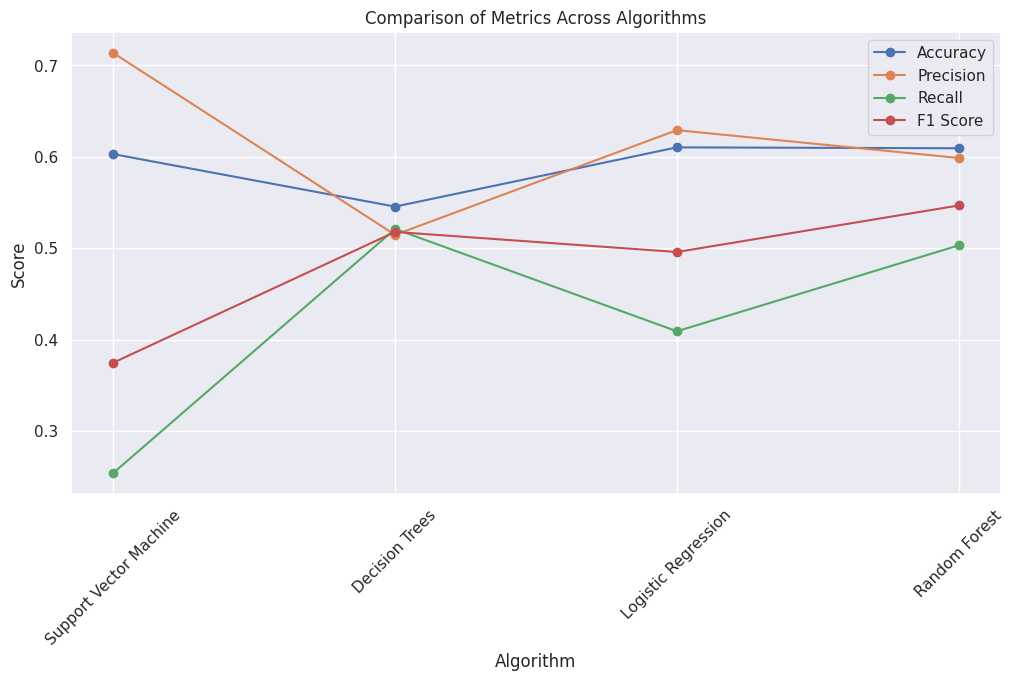

In [51]:
plt.figure(figsize=(12, 6))

# Plotting each metric
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(val_df['Algorithm'], val_df[metric], marker='o', label=metric)

plt.title('Comparison of Metrics Across Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Based on Accuracy, Logistic Regression is best model for this dataset